#TITULO DEL PROYECTO

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=6, suppress=True)

In [43]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [44]:
path_csv="./nacional3.csv"
headers = [	"primera", "segunda", "tercera", "day", "month", "year"]

lot_train =  pd.read_csv(path_csv, names=headers)

#copy dataset for future use
dataset = lot_train.copy()

#check last values on the table
dataset.tail()

#check unknown values
#dataset.isna().sum()

#drop the rows with incomplete data
#dataset = dataset.dropna()

,primera,segunda,tercera,day,month,year
3867,63,76,67,6,1,2011
3868,22,81,20,5,1,2011
3869,61,30,15,4,1,2011
3870,77,86,12,3,1,2011
3871,55,68,99,2,1,2011


In [45]:
#split data betwen training and testing in a 80% vs 20% ratio

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

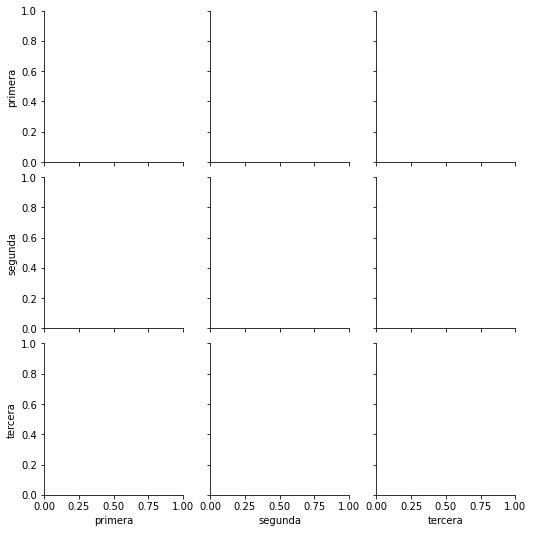

In [63]:
#Inspect the data for visual representation
#[['primera', 'segunda', 'tercera', 'day', 'month', 'year']], diag_kind='kde'
sns.pairplot(train_dataset, x_vars=['primera', 'segunda', 'tercera'], y_vars=['primera','segunda','tercera'], diag_kind='kde')

In [34]:
#check overall statistics range
train_dataset.describe().transpose()

,count,unique,top,freq
primera,3098,100,90,217
segunda,3098,100,70,223
tercera,3098,100,62,217
day,3098,31,22,108
month,3098,12,7,279
year,3098,11,2011,302


In [55]:
#prepare to train for primer value
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('primera')
test_labels = test_features.pop('primera')

In [56]:
train_dataset.describe().transpose()[['mean', 'std']]

KeyError: "None of [Index(['mean', 'std'], dtype='object')] are in the [columns]"

In [54]:
fecha = np.array(train_features['day'])
fecha_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
fecha_normalizer.adapt(fecha)

NameError: name 'train_features' is not defined